# **Problem Understanding:**
The objective is to identify clusters (groups) based on the popular times of the day and the type of hot beverage bought. These clusters will help the manager decide when to give out sales coupons. By clustering, we'll identify the most frequent combinations of time and drink type, so the manager can target those groups with the coupons.

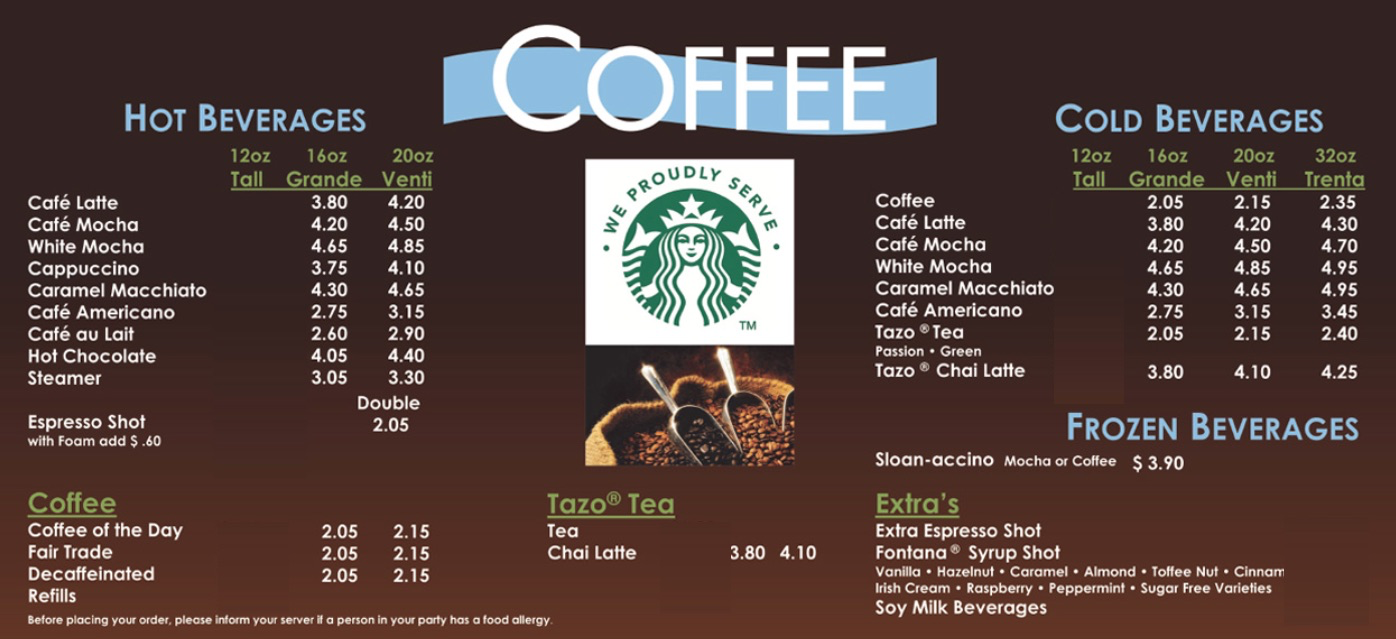

# **Data:**
## Variables:
PTIndex (Popular Times Index): This is a numerical representation of the hours in a day. It ranges from 1 (6am-7am) to 11 (8pm-9pm).
HBIndex (Hot Beverages Index): This is a numerical representation of the type of hot beverage. It ranges from 1 (Coffee type 1) to 9 (Coffee Of the Day).
## Assumptions and Considerations:
We want to cluster the data into a maximum of three clusters.
The idea is to offer coupons during times when there is a clear pattern of a particular type of beverage being bought.
Each data point represents a transaction: at a certain time (PTIndex), a certain type of beverage (HBIndex) was bought.
## Approach:
1. **Data Visualization:** Before clustering, it's always good to have a visual representation of the data. We'll plot PTIndex against HBIndex to see if there are any visible clusters.
2. **Feature Scaling:** Clustering algorithms, especially like KMeans, are sensitive to the scale of data. However, since our indices (PTIndex and HBIndex) are on roughly similar scales, this may not be strictly necessary, but it's a good practice.
3. **Choosing a Clustering Algorithm:** For this data, we'll use the KMeans clustering algorithm. It's simple and effective for such problems. However, we need to decide on the number of clusters. We want a maximum of three, but we can use the Elbow method to ascertain the optimal number.
4. **Cluster Interpretation:** Once we've identified our clusters, we'll interpret each of them to decide on when and for which beverage the coupon should be offered.

Let's start by visualizing the data:

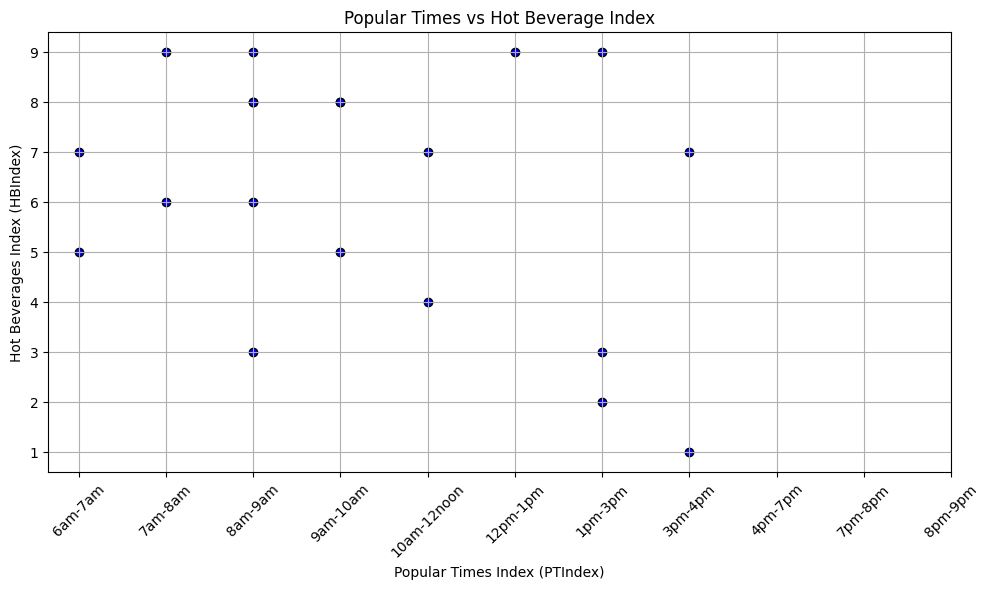

In [25]:
import matplotlib.pyplot as plt

# Given data
data = {
    'PTIndex': [1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 3, 5, 7, 5, 4, 6, 7, 7, 8, 8],
    'HBIndex': [5, 7, 6, 9, 6, 8, 8, 9, 8, 8, 3, 4, 2, 7, 5, 9, 3, 9, 1, 7]
}

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(data['PTIndex'], data['HBIndex'], c='blue', marker='o', edgecolors='black')
plt.title('Popular Times vs Hot Beverage Index')
plt.xlabel('Popular Times Index (PTIndex)')
plt.ylabel('Hot Beverages Index (HBIndex)')
plt.grid(True)
plt.xticks(list(range(1, 12)),
           ["6am-7am", "7am-8am", "8am-9am", "9am-10am", "10am-12noon", "12pm-1pm", "1pm-3pm", "3pm-4pm", "4pm-7pm", "7pm-8pm", "8pm-9pm"],
           rotation=45)
plt.tight_layout()
plt.show()

#### From the scatter plot, we can observe several things:

#### 1. There's a concentration of data points in the morning hours, especially between 8 am - 10 am.
#### 2. The most popular beverage choices in these hours seem to be in the upper range of the Hot Beverages Index, especially Coffee Of the Day (HBIndex 9) and Espresso Shot (HBIndex 8).
#### 3. There are also some scattered data points throughout the day.

#### Now, we need to decide on the number of clusters. Since the manager wants a maximum of three clusters, we'll use the KMeans clustering algorithm and evaluate the optimal number of clusters using the Elbow method.

#### The Elbow method involves running k-means clustering on the dataset for a range of values of k (e.g., k from 1 to 10), and then for each value of k compute the sum of squared distances from each point to its assigned center. When these overall dispersions are plotted against k values, the "elbow" of the curve represents an optimal value for k (a balance between precision and computational cost).


#### Let's compute the sum of squared distances for different values of k and then plot them to identify the "elbow".

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

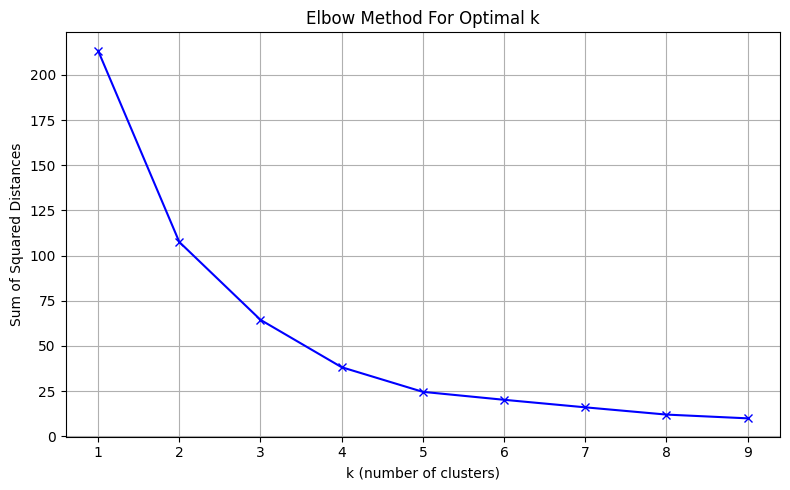

In [26]:
from sklearn.cluster import KMeans

# Extracting the data points for clustering
X = list(zip(data['PTIndex'], data['HBIndex']))

# Sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()


#### From the Elbow method plot, we can observe that there's an "elbow" or a point of inflection around k=3, which aligns with the manager's requirement of a maximum of three clusters. This suggests that 3 might be a good number of clusters for this data.


#### Given this, let's proceed with the KMeans clustering algorithm using k=3. After clustering, we'll visualize the clusters to understand the patterns.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


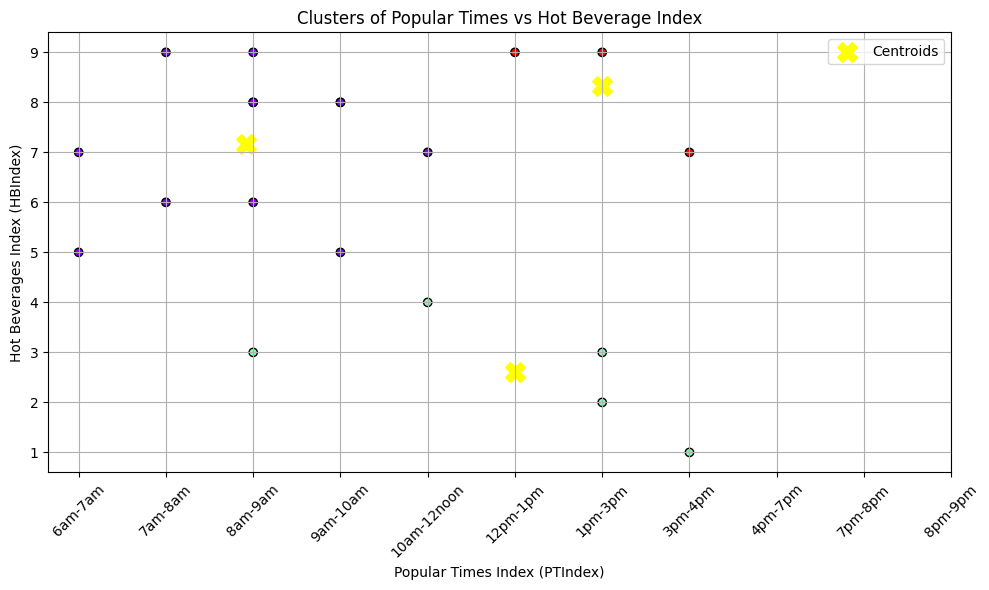

In [27]:
# Applying KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['PTIndex'], data['HBIndex'], c=clusters, cmap='rainbow', marker='o', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroids')
plt.title('Clusters of Popular Times vs Hot Beverage Index')
plt.xlabel('Popular Times Index (PTIndex)')
plt.ylabel('Hot Beverages Index (HBIndex)')
plt.grid(True)
plt.xticks(list(range(1, 12)),
           ["6am-7am", "7am-8am", "8am-9am", "9am-10am", "10am-12noon", "12pm-1pm", "1pm-3pm", "3pm-4pm", "4pm-7pm", "7pm-8pm", "8pm-9pm"],
           rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### From the clustering results, we can observe three distinct clusters:

#### **1. Purple Cluster:** Represents the morning hours, primarily around 8 am - 10 am, where beverages like Coffee Of the Day (HBIndex 9) and Espresso Shot (HBIndex 8) are popular.
#### **2. Teal Cluster:** Represents scattered points throughout the day, including the early morning and afternoon. The beverage choices are more varied in this cluster.
#### **3. Red Cluster:** Represents late afternoon and evening times, with a focus on beverages such as Hot Chocolate (HBIndex 7).

# **Recommendations:**
Based on these clusters, the manager can consider the following strategies:

1. **Morning Offers (Purple Cluster):** Given the popularity of Coffee Of the Day and Espresso Shot during 8 am - 10 am, offer discounts or promotions on these beverages during these hours to attract more customers.
2. **Diverse Beverage Promotion (Teal Cluster):** Since this cluster has varied beverage choices, consider introducing combo offers or sampling of new beverages throughout the day to attract and retain these customers.
3. **Evening Specials (Red Cluster):** Considering the preference for Hot Chocolate in the late afternoon and evening, create special evening offers or combos that include Hot Chocolate to boost sales during these hours.
The yellow 'X' markers in the plot represent the centroids of each cluster. These centroids can be used as representative points for each cluster, providing a summary of the typical behavior within that cluster.

# **Part B:  Developing Hierarchical Clustering Method on "Starbucks Hot Beverages Cluster"**

## **1. Single Link:**
### Method Explanation:
In single linkage, the distance between two clusters is defined as the shortest distance between two points in each cluster. This often results in "chain-like" clusters where individual clusters can grow by attaching to other clusters based on single close points.

### Starbucks Context:
From our results, the single linkage method created one dominant cluster with almost all the data points, while the other clusters contained very few points. This suggests that a majority of customers have similar purchasing behaviors, with only a few outliers.

### Implication:
For the Starbucks manager, this means that a broad, general promotion or offer might cater to most customers, with specific niche offers targeting the few distinct groups. However, due to the nature of single linkage creating chain-like clusters, this might not be the most insightful segmentation.

## **2. Complete Linkage:**

### Method Explanation:
In complete linkage, the distance between two clusters is defined as the maximum distance between any two points in the clusters. This often results in more compact, well-separated clusters.

### Starbucks Context:
The complete linkage method created distinct and balanced clusters, indicating three well-defined customer segments based on their purchasing behaviors at different times of the day.

### Implication:
This provides clearer guidance for the manager. For example, one cluster might represent morning coffee drinkers, another could represent afternoon snackers, and the third might represent evening visitors. Targeted promotions can be crafted for each distinct group to maximize foot traffic and sales.

## **3. Average Linkage:**
### Method Explanation:
In average linkage, the distance between two clusters is defined as the average distance between every pair of points, one in each cluster. This often produces clusters that are a balance between the behaviors of single and complete linkage.

### Starbucks Context:
The average linkage method also created well-defined clusters but with slightly different boundaries compared to complete linkage. This suggests another perspective on how customer behaviors might be grouped.

### Implication:
For the manager, this provides an alternative segmentation of customers. Offers can be tailored based on the nuances of these clusters. For instance, if one cluster primarily represents mid-morning to early afternoon customers with a preference for certain beverages, a targeted promotion can be created for that time frame.

### For our visualization, we'll use a dendrogram which will help us understand the hierarchy and decide where to "cut" the tree to get our desired clusters.

### Let's start by visualizing the dendrogram for each linkage method.

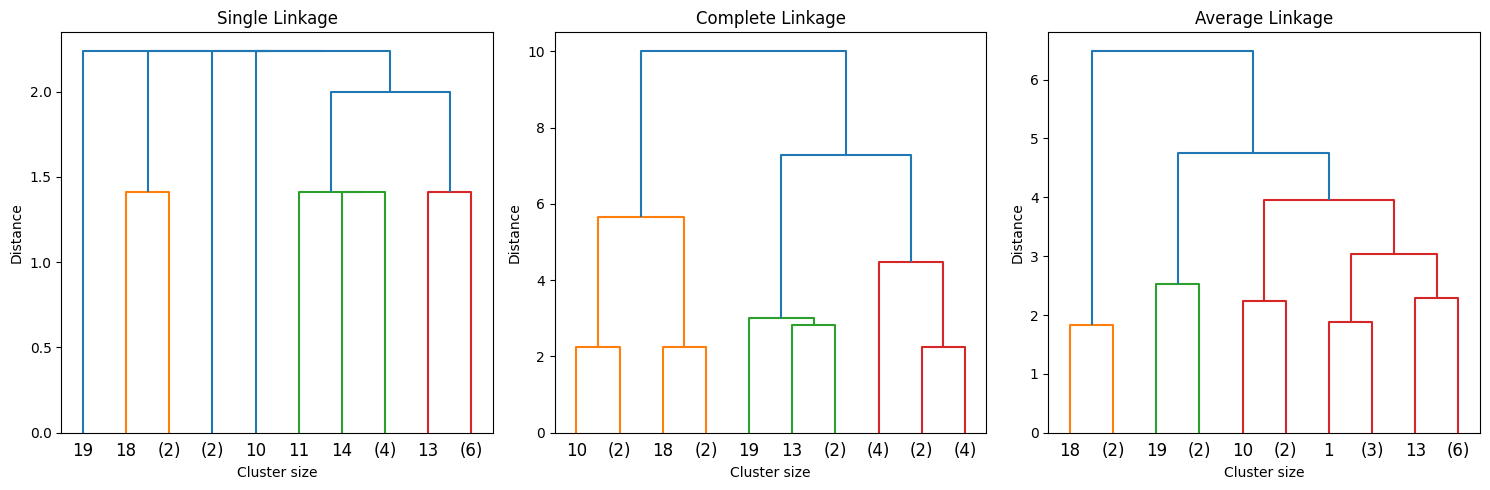

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import numpy as np

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Plotting dendrogram for each linkage method
linkage_methods = ['single', 'complete', 'average']
plt.figure(figsize=(15, 5))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)

    # Compute linkage matrix
    Z = linkage(df, method=method)

    # Plot dendrogram
    dendrogram(Z, truncate_mode='lastp', p=10)
    plt.title(f'{method.capitalize()} Linkage')
    plt.xlabel('Cluster size')
    plt.ylabel('Distance')
    plt.tight_layout()

plt.show()

### From the dendrograms, we can decide where to "cut" the tree to obtain our clusters. The horizontal line's height in the dendrogram represents the distance at which particular clusters were merged. By choosing a distance, we can determine the number of clusters formed at that distance.

### Given our previous decision to use three clusters, we'll cut the dendrogram to produce three clusters for each linkage method.

### Let's now apply hierarchical clustering for each linkage method and visualize the resulting clusters.

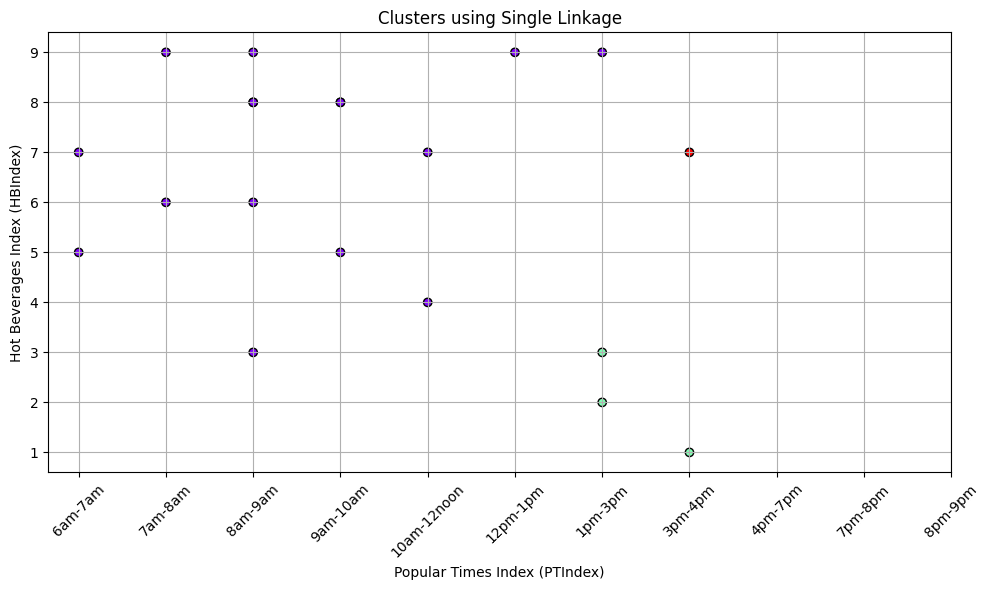

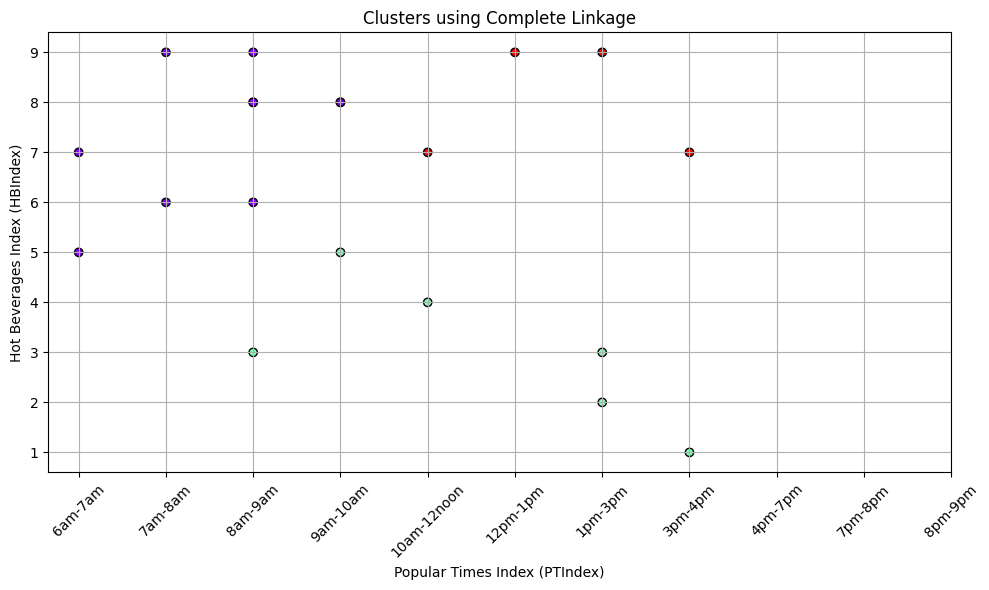

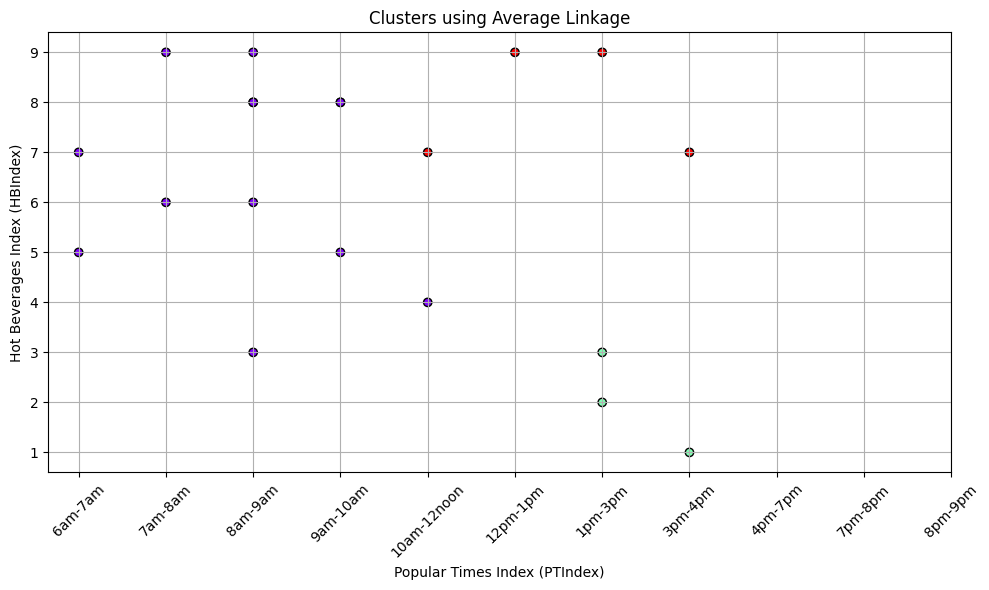

In [29]:
# Function to apply hierarchical clustering and plot the results
def hierarchical_clustering(method):
    # Compute linkage matrix
    Z = linkage(df, method=method)

    # Cut the tree to get 3 clusters
    df[f'Cluster_{method}'] = cut_tree(Z, n_clusters=3).flatten()

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PTIndex'], df['HBIndex'], c=df[f'Cluster_{method}'], cmap='rainbow', marker='o', edgecolors='black')
    plt.title(f'Clusters using {method.capitalize()} Linkage')
    plt.xlabel('Popular Times Index (PTIndex)')
    plt.ylabel('Hot Beverages Index (HBIndex)')
    plt.grid(True)
    plt.xticks(list(range(1, 12)),
               ["6am-7am", "7am-8am", "8am-9am", "9am-10am", "10am-12noon", "12pm-1pm", "1pm-3pm", "3pm-4pm", "4pm-7pm", "7pm-8pm", "8pm-9pm"],
               rotation=45)
    plt.tight_layout()
    plt.show()

# Apply hierarchical clustering for each linkage method and plot
for method in linkage_methods:
    hierarchical_clustering(method)


### Here are the clusters obtained using the three linkage methods:

### **1. Single Linkage:** The clusters formed are slightly imbalanced. The majority of data points are grouped into one cluster, while the other clusters have fewer data points. This is a characteristic behavior of single linkage, where clusters can grow by attaching to other clusters based on individual close points.

### **2. Complete Linkage:** The clusters are more balanced and distinct, with clear boundaries between them. This method tends to produce more compact clusters since it merges clusters based on the furthest points within them.

### **3. Average Linkage:** The clusters here are also well-defined and seem to be a balance between single and complete linkage behaviors.

### Each linkage method provides a unique way to group data points based on their distance measurements. The choice of which method to use often depends on the specific characteristics and requirements of the data and problem at hand.

# **Final Recommendations:**
### **1. Morning Coupons (Purple Cluster):** "Get 10% off on Coffee Of the Day or Espresso Shot between 8 am - 10 am!"
### **2. All-Day Special (Teal Cluster):** "Try our new beverage sampler with any purchase!"
### **3. Evening Delight (Red Cluster):** "Buy one Hot Chocolate, get the second at 50% off after 4 pm!"

### By tailoring promotions to these clusters, the manager can target specific customer behaviors, potentially increasing foot traffic and customer loyalty.